In [1]:
import requests
import json
import pandas as pd
import numpy as np
import random
import math
from datetime import date, timedelta

In [2]:
def isHighTrafficDate(currentDateIteration):
    IMPORTANTDATES = [date(2019, 2, 14), date(2019, 3, 8), date(2019, 3, 31), date(2019, 5, 1), date(2019, 9, 29), date(2019, 12, 24), date(2020, 2, 14)]
    for i in range(len(IMPORTANTDATES)):
        delta = timedelta(days=1)
        lower = IMPORTANTDATES[i] - delta
        if lower < currentDateIteration <= IMPORTANTDATES[i]:
            return True
    return False

In [3]:
cities = pd.read_csv('uscities.csv')
city = cities.loc[cities['city'] == 'Seattle']
city

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
106,Seattle,Seattle,WA,Washington,53033,King,53033,King,47.6211,-122.3244,3643765.0,3336.0,polygon,False,True,America/Los_Angeles,1,98109 98108 98104 98107 98106 98101 98103 9810...,1840021117


In [4]:
products = pd.read_csv('products.csv')
brands = ['Contoso', 'Proseware', 'Fabrikam', 'Relecloud', 'Trey Research', 'Northwind Traders', 'Contoso', 'Proseware', 'Fabrikam', 'Relecloud']
products = products.drop(columns=['Price'])
products['ProductBrand'] = brands
products.head(10)

,Code,Name,Stock,Rating,ProductBrand
0,3305FBF3-CCEC-4016-9EED-02664A1E7E78,Creamy Peanut Butter 40 oz,18,4,Contoso
1,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,5,Proseware
2,9A79605B-132B-4089-AD8C-622B770CBB7A,White Truffles,12,4,Fabrikam
3,2B6A3EAA-7622-4669-A7D5-81303B15D9DB,Fresh Blueberries,19,4,Relecloud
4,26F09080-FF55-473E-8BD7-9CBFEE92B87B,Milk Chocolate Candy Bars,16,5,Trey Research
5,763C5B56-9CD2-47A3-8AE7-B82362C7849C,"Tomato Ketchup, 32 oz Bottle",12,5,Northwind Traders
6,F7FD0BD1-EFEF-4F45-876D-CE4BB349B0CC,Great Value 2% Reduced-Fat Milk,14,4,Contoso
7,20419EE1-6468-4498-BB55-F2869308F1A3,Green Seedless Grapes,11,4,Proseware
8,2ACA5DD3-C46F-4FD3-ACE2-FB307B4D1FCD,Veggie Dip Ranch,21,3,Fabrikam
9,8249EFA3-B8F0-46A4-A259-FC83797EBD05,Great Value Large White Eggs,14,5,Relecloud


In [5]:
weather = pd.read_csv('seattle_weather.csv')
weather['Date'] = pd.to_datetime(weather['Date'])
weather['tmax'] = weather['tmax'].fillna(weather['tmax'].mean())
weather['tmin'] = weather['tmin'].fillna(weather['tmax'].mean())
weather['prcp'] = weather['prcp'].fillna(weather['prcp'].mean())
weather.sort_values(by='Date', ascending=False).head(5)

,Date,tmax,tmin,prcp
0,2020-12-31,53.1,46.0,0.26
1,2020-12-30,48.0,43.0,0.04
2,2020-12-29,51.1,39.9,0.01
3,2020-12-28,46.9,41.0,0.00
4,2020-12-27,45.0,37.0,0.01


In [6]:
weather.describe()

,tmax,tmin,prcp
count,731.000000,731.000000,731.000000
mean,61.332558,46.805472,0.078331
std,12.919869,9.689839,0.165122
min,32.000000,20.100000,0.000000
25%,51.100000,39.900000,0.000000
50%,60.100000,46.000000,0.000000
75%,72.000000,55.000000,0.080000
max,95.000000,66.000000,1.220000


In [7]:
def isHighTrafficDate(currentDateIteration):
    if currentDateIteration.weekday() < 5:
        return True
    IMPORTANTDATES = [date(2019, 2, 14), date(2019, 3, 8), date(2019, 3, 31), date(2019, 5, 1), date(2019, 9, 29), date(2019, 12, 24), date(2020, 2, 14)]
    for i in range(len(IMPORTANTDATES)):
        delta = timedelta(days=5)
        lower = IMPORTANTDATES[i] - delta
        if lower < currentDateIteration < IMPORTANTDATES[i]:
            return True
    return False

In [8]:
PRODUCTS = products.values

RECORDS = []

start_date = date(2019, 1, 1)
end_date = date(2020, 12, 31)
delta = timedelta(days=1)

while start_date <= end_date:
    currentdate = start_date.strftime('%Y-%m-%d')
    weatherrecs = weather.loc[weather['Date'] == start_date]
    weeknumber = start_date.isocalendar()[1]
    start_date += delta
    avgTemp = (weatherrecs['tmin'].values[0] + weatherrecs['tmax'].values[0]) / 2
    for index, product in enumerate(PRODUCTS):
        quantitySold = random.randrange(1, 9)
        #if isHighTrafficDate(start_date):
         #   quantitySold = random.randrange(11, 20)
            
        if avgTemp < 45 and product[1] == 'Creamy Peanut Butter 40 oz':
                quantitySold = random.randrange(15, 24)

        if avgTemp < 45 and product[1] == 'Awesome Instant Noodles':
                quantitySold = random.randrange(21, 22)
        
        if avgTemp < 45 and product[1] == 'Lindt Lindor Truffles White':
                quantitySold = random.randrange(28, 35)

        if avgTemp > 52 and product[1] == 'Fresh Blueberries':
                quantitySold = random.randrange(38, 50)

        if avgTemp < 45 and product[1] == 'Milk Chocolate Candy Bars':
                quantitySold = random.randrange(30, 53)
            
        if avgTemp < 45 and product[1] == 'Tomato Ketchup, 32 oz Bottle':
                quantitySold = random.randrange(10, 20)

        if avgTemp < 45 and product[1] == 'Canned Beans':
                quantitySold = random.randrange(50, 60)

        if avgTemp > 52 and product[1] == 'Canned Beans':
                quantitySold = random.randrange(10, 30)

        if avgTemp > 52 and product[1] == 'Green Seedless Grapes':
                quantitySold = random.randrange(15, 18)
            
        if avgTemp < 45 and product[1] == 'Marzetti Veggie Dip Ranch':
                quantitySold = random.randrange(20, 31)

        if avgTemp > 52 and product[1] == 'Great Value Large White Eggs':
                quantitySold = random.randrange(10, 20)
        
        RECORDS.append({
                'DATE': currentdate,
                'STORE_ID': city['id'].values[0],
                'STORE_CITY': city['city'].values[0],
                'STORE_STATE': city['state_name'].values[0],
                'PRODUCT_ID': product[0],
                'PRODUCT_NAME': product[1],
                'PRODUCT_BRAND': product[2],    
                'QUANTITY': quantitySold,
                'TMAX': weatherrecs['tmax'].values[0],
                'TMIN': weatherrecs['tmin'].values[0],
                'TEMPERATURE_MEAN': avgTemp,
                'PRECIPITATION': weatherrecs['prcp'].values[0],
                'WEEK': weeknumber})

In [9]:
transactions = pd.DataFrame(RECORDS)
transactions.head(50)

,DATE,STORE_ID,STORE_CITY,STORE_STATE,PRODUCT_ID,PRODUCT_NAME,PRODUCT_BRAND,QUANTITY,TMAX,TMIN,TEMPERATURE_MEAN,PRECIPITATION,WEEK
0,2019-01-01,1840021117,Seattle,Washington,3305FBF3-CCEC-4016-9EED-02664A1E7E78,Creamy Peanut Butter 40 oz,18,21,44.1,33.1,38.60,0.00,1
1,2019-01-01,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,56,44.1,33.1,38.60,0.00,1
2,2019-01-01,1840021117,Seattle,Washington,9A79605B-132B-4089-AD8C-622B770CBB7A,White Truffles,12,3,44.1,33.1,38.60,0.00,1
3,2019-01-01,1840021117,Seattle,Washington,2B6A3EAA-7622-4669-A7D5-81303B15D9DB,Fresh Blueberries,19,4,44.1,33.1,38.60,0.00,1
4,2019-01-01,1840021117,Seattle,Washington,26F09080-FF55-473E-8BD7-9CBFEE92B87B,Milk Chocolate Candy Bars,16,50,44.1,33.1,38.60,0.00,1
5,2019-01-01,1840021117,Seattle,Washington,763C5B56-9CD2-47A3-8AE7-B82362C7849C,"Tomato Ketchup, 32 oz Bottle",12,14,44.1,33.1,38.60,0.00,1
6,2019-01-01,1840021117,Seattle,Washington,F7FD0BD1-EFEF-4F45-876D-CE4BB349B0CC,Great Value 2% Reduced-Fat Milk,14,1,44.1,33.1,38.60,0.00,1
7,2019-01-01,1840021117,Seattle,Washington,20419EE1-6468-4498-BB55-F2869308F1A3,Green Seedless Grapes,11,5,44.1,33.1,38.60,0.00,1
8,2019-01-01,1840021117,Seattle,Washington,2ACA5DD3-C46F-4FD3-ACE2-FB307B4D1FCD,Veggie Dip Ranch,21,2,44.1,33.1,38.60,0.00,1
9,2019-01-01,1840021117,Seattle,Washington,8249EFA3-B8F0-46A4-A259-FC83797EBD05,Great Value Large White Eggs,14,6,44.1,33.1,38.60,0.00,1


In [10]:
transactions.describe()

,STORE_ID,PRODUCT_BRAND,QUANTITY,TMAX,TMIN,TEMPERATURE_MEAN,PRECIPITATION,WEEK
count,7.310000e+03,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000,7310.000000
mean,1.840021e+09,14.200000,11.306293,61.332558,46.805472,54.069015,0.078331,26.679891
std,0.000000e+00,4.377513,13.050295,12.911912,9.683872,10.971248,0.165021,15.075724
min,1.840021e+09,5.000000,1.000000,32.000000,20.100000,27.050000,0.000000,1.000000
25%,1.840021e+09,12.000000,3.000000,51.100000,39.900000,45.000000,0.000000,14.000000
50%,1.840021e+09,14.000000,6.000000,60.100000,46.000000,53.100000,0.000000,27.000000
75%,1.840021e+09,18.000000,15.000000,72.000000,55.000000,63.500000,0.080000,40.000000
max,1.840021e+09,21.000000,59.000000,95.000000,66.000000,79.950000,1.220000,53.000000


In [11]:
transactions = transactions.sort_values(by='DATE', ascending=True)
#transactions.to_parquet('training_dataset.parquet')

In [12]:
import seaborn as sns
canned = transactions.loc[transactions['PRODUCT_NAME'] == 'Canned Beans']
canned.plot(x='DATE', y=['TEMPERATURE_MEAN', 'QUANTITY'], figsize=(50,5), grid=True)

In [13]:
transactions.tail(2)

,DATE,STORE_ID,STORE_CITY,STORE_STATE,PRODUCT_ID,PRODUCT_NAME,PRODUCT_BRAND,QUANTITY,TMAX,TMIN,TEMPERATURE_MEAN,PRECIPITATION,WEEK
7307,2020-12-31,1840021117,Seattle,Washington,20419EE1-6468-4498-BB55-F2869308F1A3,Green Seedless Grapes,11,7,53.1,46.0,49.55,0.26,53
7309,2020-12-31,1840021117,Seattle,Washington,8249EFA3-B8F0-46A4-A259-FC83797EBD05,Great Value Large White Eggs,14,3,53.1,46.0,49.55,0.26,53


In [14]:
train_data = transactions.iloc[:5000]

In [15]:
train_data.to_parquet('train_data.parquet')


In [16]:
transactions.shape

(7310, 13)

In [17]:
test_data = transactions.iloc[-2310:]
test_data = test_data.loc[test_data['PRODUCT_ID'] == 'E116E46B-DC84-4986-BAE2-17FE1DBB759E']
#test_data.to_parquet('test_data.parquet')

In [18]:
test_data.shape

(231, 13)

In [29]:
from datetime import datetime

tmax = 45
tmin = 40
avgTemp = (tmax + tmin) / 2
nTest = test_data.copy()
nTest['DATE'] =  pd.to_datetime(nTest['DATE'], format='%Y-%m-%d')
nTest['TMIN'].loc[nTest['DATE'] > datetime(2020, 10, 30)] = tmin
nTest['TMAX'].loc[nTest['DATE'] > datetime(2020, 10, 30)] = tmax
nTest['TEMPERATURE_MEAN'].loc[nTest['DATE'] > datetime(2020, 10, 30)] = avgTemp

nTest

,DATE,STORE_ID,STORE_CITY,STORE_STATE,PRODUCT_ID,PRODUCT_NAME,PRODUCT_BRAND,QUANTITY,TMAX,TMIN,TEMPERATURE_MEAN,PRECIPITATION,WEEK
5001,2020-05-15,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,16,71.1,52.0,61.55,0.02,20
5011,2020-05-16,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,26,64.0,53.1,58.55,0.13,20
5021,2020-05-17,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,25,64.0,52.0,58.00,0.05,20
5031,2020-05-18,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,28,71.1,51.1,61.10,0.00,21
5041,2020-05-19,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,15,70.0,53.1,61.55,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,2020-12-27,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,52,45.0,40.0,42.50,0.01,52
7271,2020-12-28,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,54,45.0,40.0,42.50,0.00,53
7281,2020-12-29,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,8,45.0,40.0,42.50,0.01,53
7291,2020-12-30,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,2,45.0,40.0,42.50,0.04,53


In [30]:
from datetime import datetime

tmax = 35
tmin = 30
avgTemp = (tmax + tmin) / 2
nTest['TMIN'].loc[nTest['DATE'] > datetime(2020, 11, 30)] = tmin
nTest['TMAX'].loc[nTest['DATE'] > datetime(2020, 11, 30)] = tmax
nTest['TEMPERATURE_MEAN'].loc[nTest['DATE'] > datetime(2020, 11, 30)] = avgTemp

nTest

,DATE,STORE_ID,STORE_CITY,STORE_STATE,PRODUCT_ID,PRODUCT_NAME,PRODUCT_BRAND,QUANTITY,TMAX,TMIN,TEMPERATURE_MEAN,PRECIPITATION,WEEK
5001,2020-05-15,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,16,71.1,52.0,61.55,0.02,20
5011,2020-05-16,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,26,64.0,53.1,58.55,0.13,20
5021,2020-05-17,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,25,64.0,52.0,58.00,0.05,20
5031,2020-05-18,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,28,71.1,51.1,61.10,0.00,21
5041,2020-05-19,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,15,70.0,53.1,61.55,0.00,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7261,2020-12-27,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,52,35.0,30.0,32.50,0.01,52
7271,2020-12-28,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,54,35.0,30.0,32.50,0.00,53
7281,2020-12-29,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,8,35.0,30.0,32.50,0.01,53
7291,2020-12-30,1840021117,Seattle,Washington,E116E46B-DC84-4986-BAE2-17FE1DBB759E,Canned Beans,5,2,35.0,30.0,32.50,0.04,53


In [31]:
nTest.to_parquet('ntest_data.parquet')

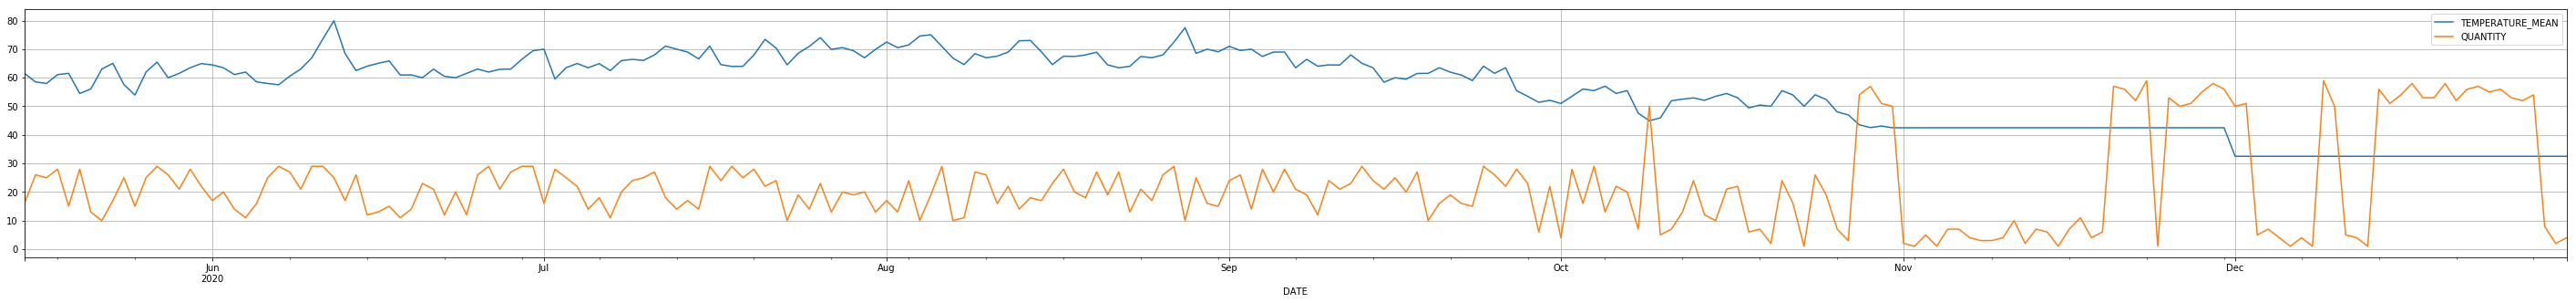

In [32]:
nTest.plot(x='DATE', y=['TEMPERATURE_MEAN', 'QUANTITY'], figsize=(50,5), grid=True)